In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


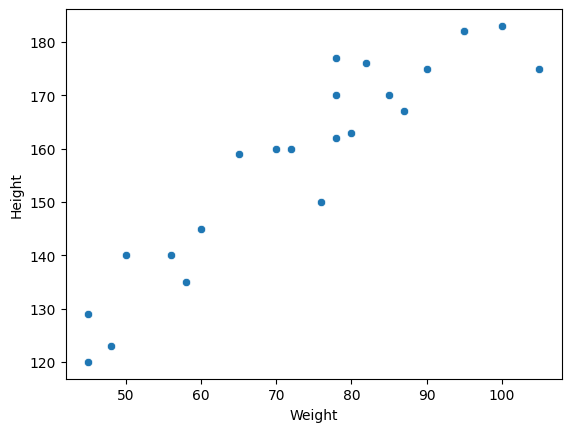

In [4]:
# plot = sns.scatterplot(x=df.Weight,y=df.Height)
plot = sns.scatterplot(x=df['Weight'],y=df['Height']) #This way of calling is better as this gives us more flaxibility.
plot.xlable = 'Weight(Kg)'
plot.ylable = 'Height(cm)'
# as we can see this plot is linear relationship

In [5]:
# Correlationship
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


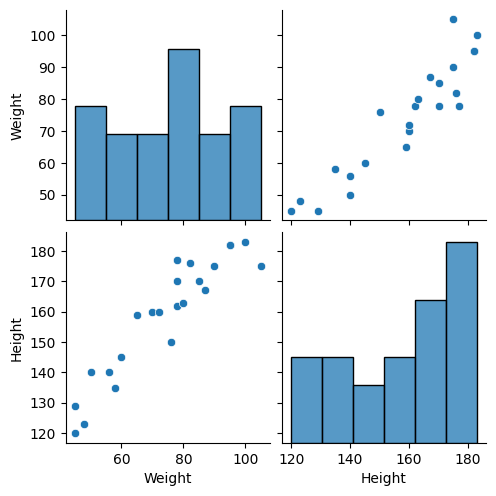

In [6]:
sns.pairplot(df)

In [9]:
# Divide fatures into independent and dependent features.

X=df[['Weight']] #Independent feature should be dataframe or two dimensional array.
np.array(X)

y=df['Height'] # We can use 1 dimensional array or series for dependent features.



In [10]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25, random_state=42)


In [11]:
X_train.shape

(17, 1)

In [12]:
# Standardization (Mean is zero and standard deviation is one ) # This is done to make the calculation easy
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()



In [13]:
X_train = scaler.fit_transform(X_train) #fit transform learns form data and then apply transformation. 
X_test = scaler.transform(X_test)

In [14]:
# Apply Simple linear regresion 
from sklearn.linear_model import LinearRegression

In [15]:
regression = LinearRegression(n_jobs=-1) #Firstly initialize the object

In [16]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [17]:
print("Coefficient or slope is",regression.coef_)
print("Intefcept is",regression.intercept_)

Coefficient or slope is [17.2982057]
Intefcept is 156.47058823529412


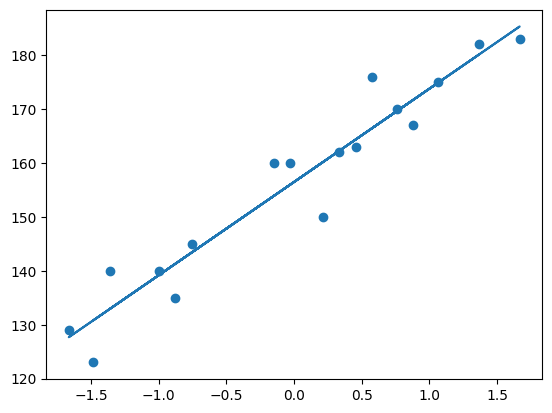

In [18]:
# plot training data plot best fit line
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))

predict the test data

Predicted height output = intercept + coeff_(Weights)

so y_predict_test = 156.47058823529412 + 17.2982057(X_test)

In [19]:
# Prediction for the test data
y_predict = regression.predict(X_test)

In [20]:
# Perfprmance Matrics

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [21]:
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


## R Square

Formula 

R^2 = 1- SSR/SST

In [23]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_predict)
print(score)

0.7360826717981276


## Adjusted R Square

formula

Adjusted R Square = 1-[(1-R2)*(n-1)/(n-k-1)]

In [25]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6701033397476595

In [30]:
# OLS linear Regression 
import statsmodels.api as sm

In [ ]:
model = sm.OLS(y_train)